<h2><center>Heart Disease Prediction with Artificial Neural Networks<h2><center>

### 0. INTRODUCTION


#### According to the world health organisation, heart disease affects more than 64 million people worldwide, and an estimated 17.9 million people die of it each year.
#### The aim of this project is to build an Artificial Neural Network (ANN) machine learning model to predict heart failure.
#### The dataset is obtained from Kaggle.
#### As the target of the prediction is a 'yes' or 'no' (0 or 1), this is a Classification Problem. Moreover, as the dataset is already labelled, we will need to build a supervised model.

### 1. UPLOADING & CHECKING DATA

#### 1.1. Import Libraries & Upload Database

In [649]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [650]:
data = pd.read_csv('heart_failure_clinical_records_dataset 2.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#### 1.2. Check 'info' & 'describe'

In [651]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [652]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### 1.3. Check for missing values & duplicates

In [653]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [654]:
data.duplicated().sum()

0

### 2. VISUALISING DATA

#### 2.2. Check through visualisations for skewed data

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

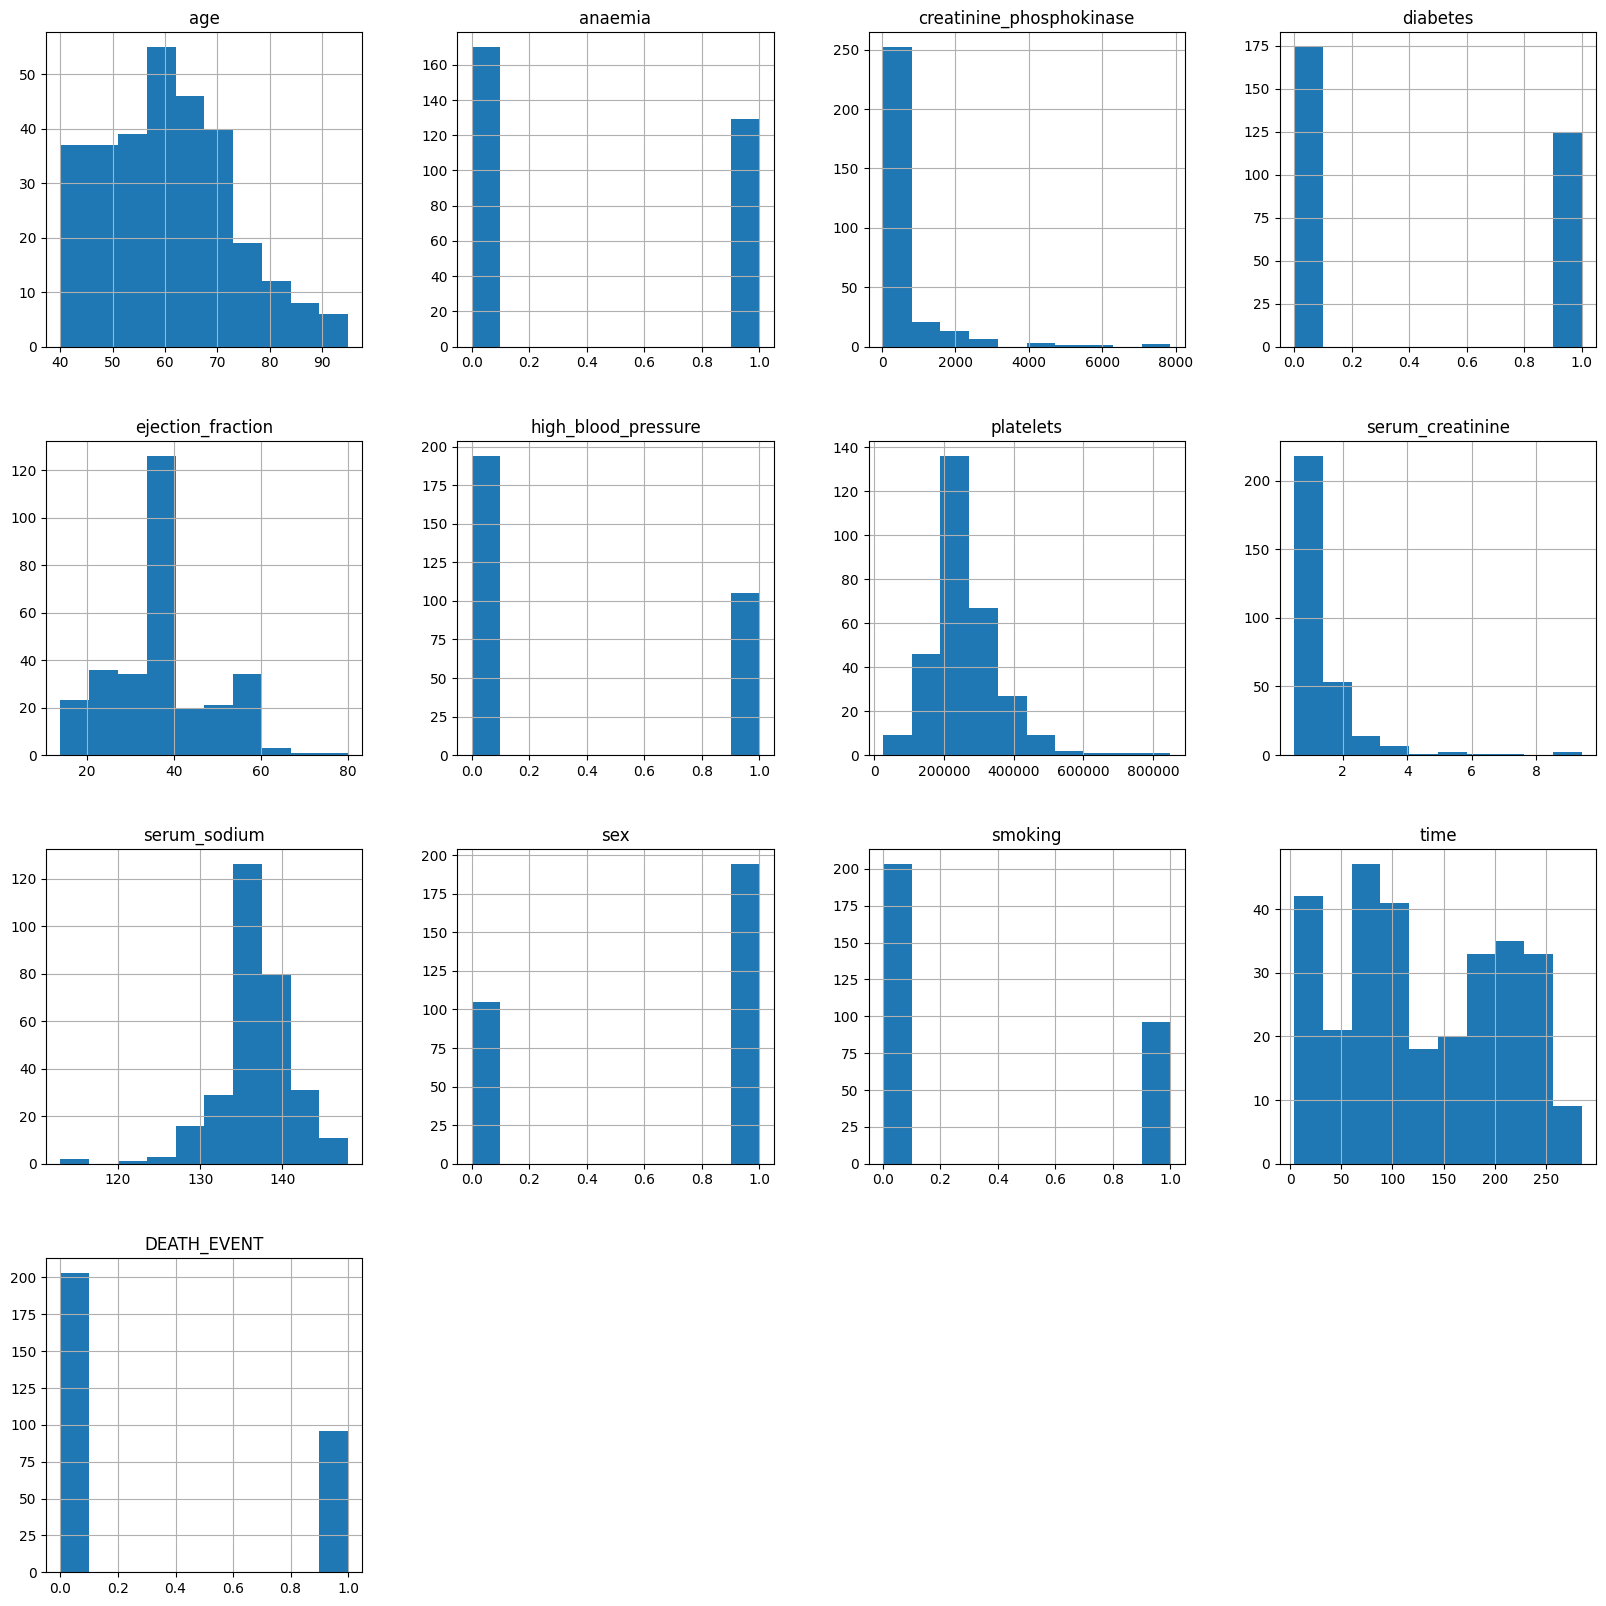

In [655]:
data.hist(bins =10, figsize=(20,20))

#### 2.1. Check through visualisations for number of death events vs non-death events

[Text(0, 0, '203'), Text(0, 0, '96')]

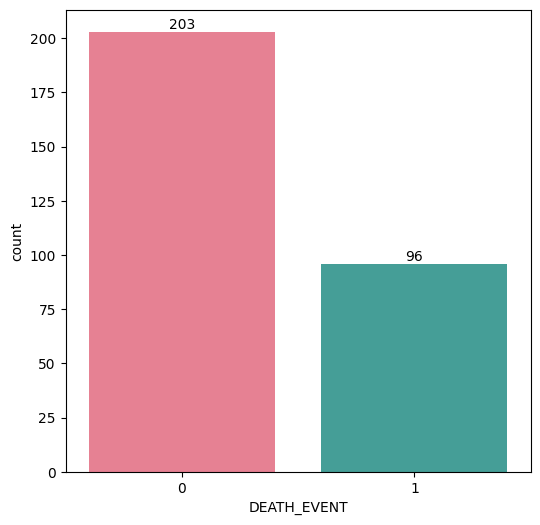

In [656]:
plt.figure(figsize =(6,6))
fig_1 = sns.countplot(x= data["DEATH_EVENT"], palette= 'husl')
fig_1.bar_label(fig_1.containers[0])

#### 2.3. Check through visualisations for correlations

<Axes: >

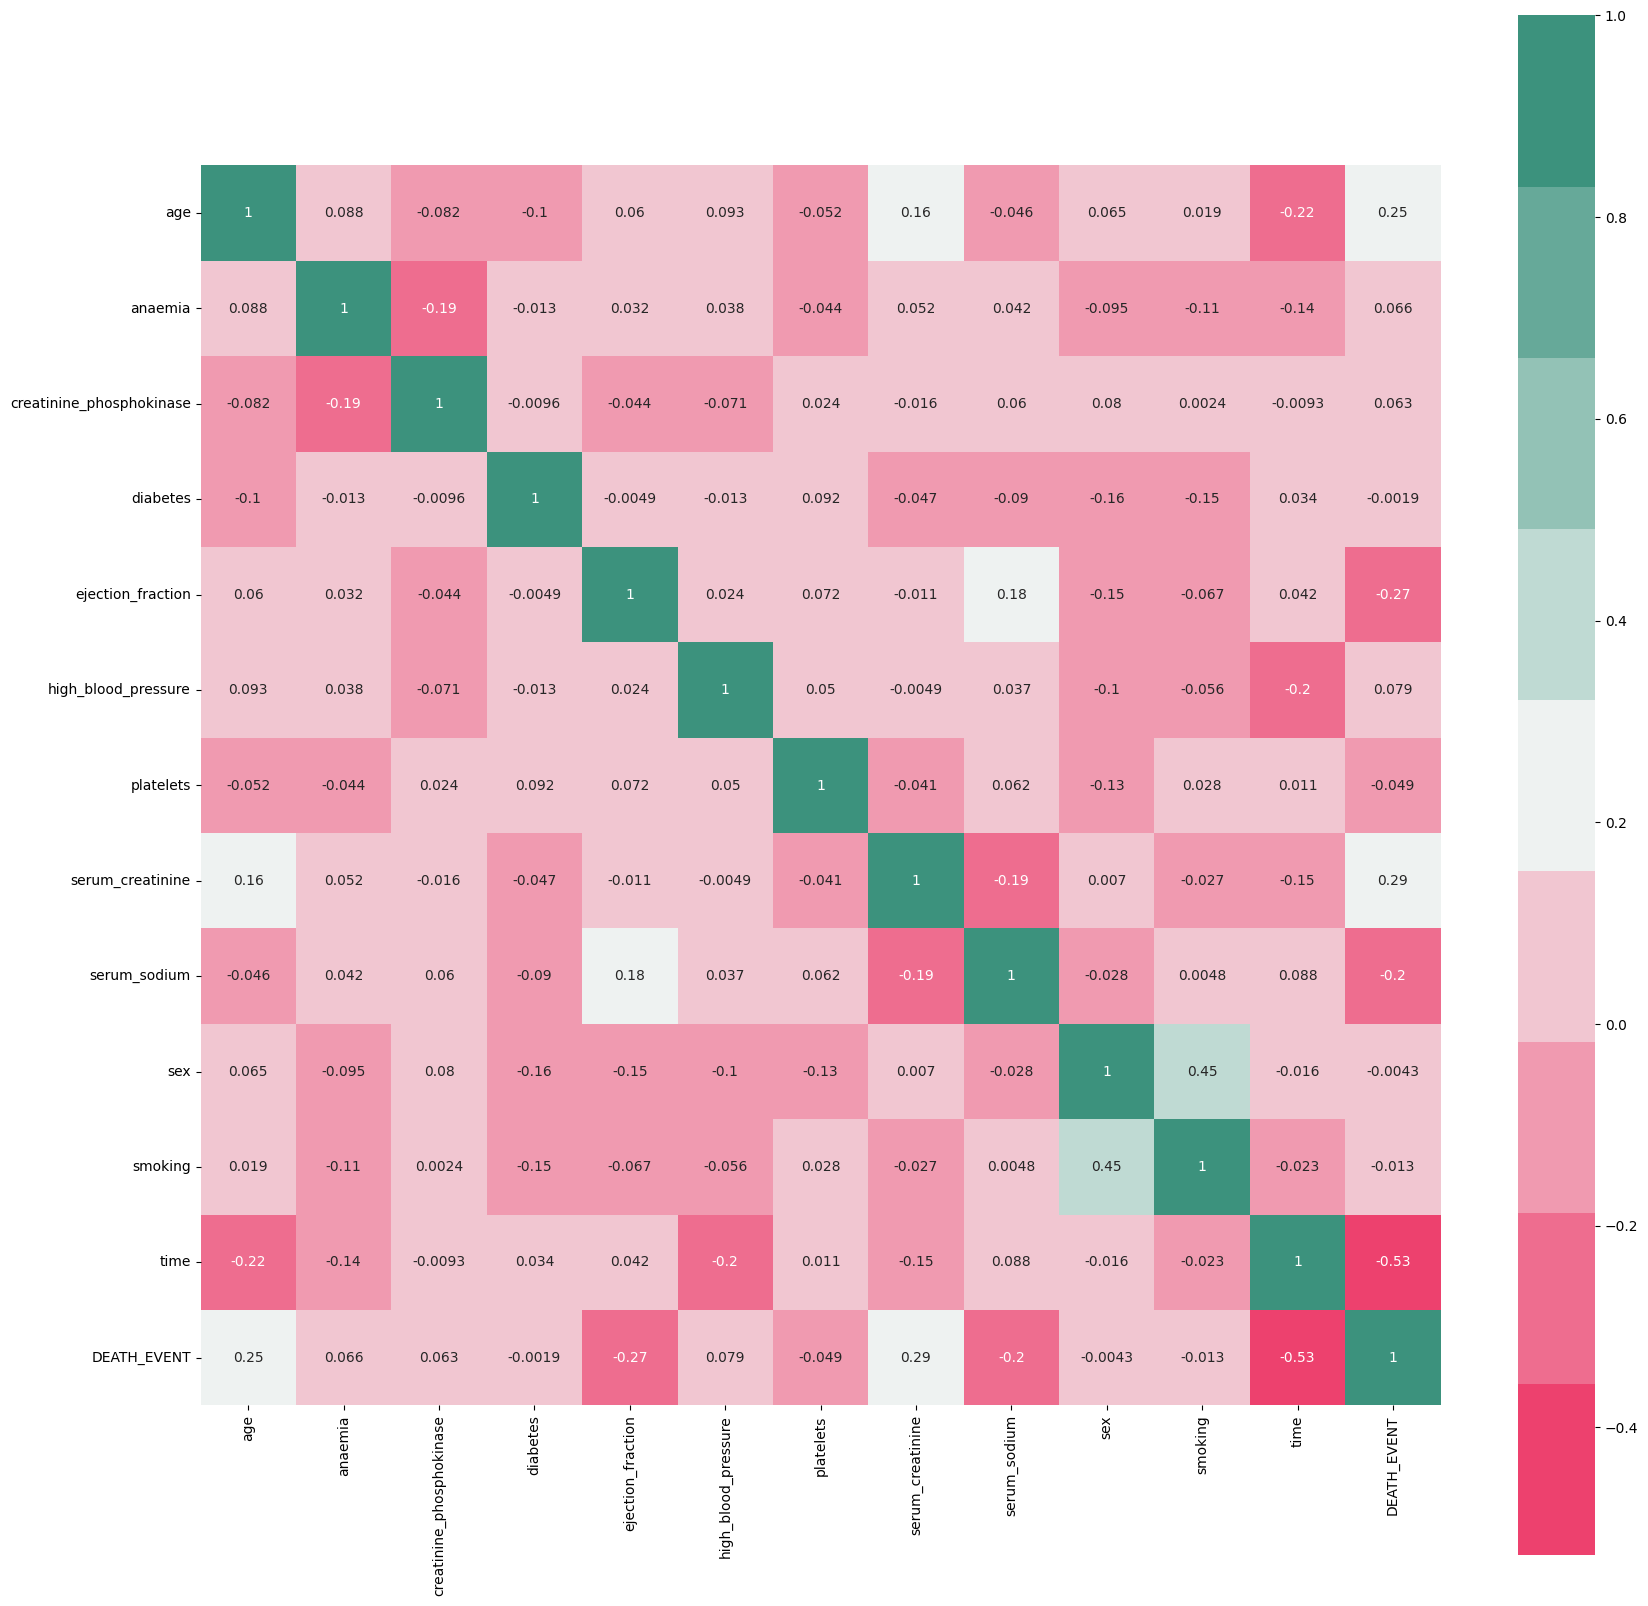

In [657]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
fig_2 = data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(fig_2,cmap= cmap,annot=True, square=True)

#### 2.2. Check through visualisations for distribution of age

Text(0, 0.5, 'Count')

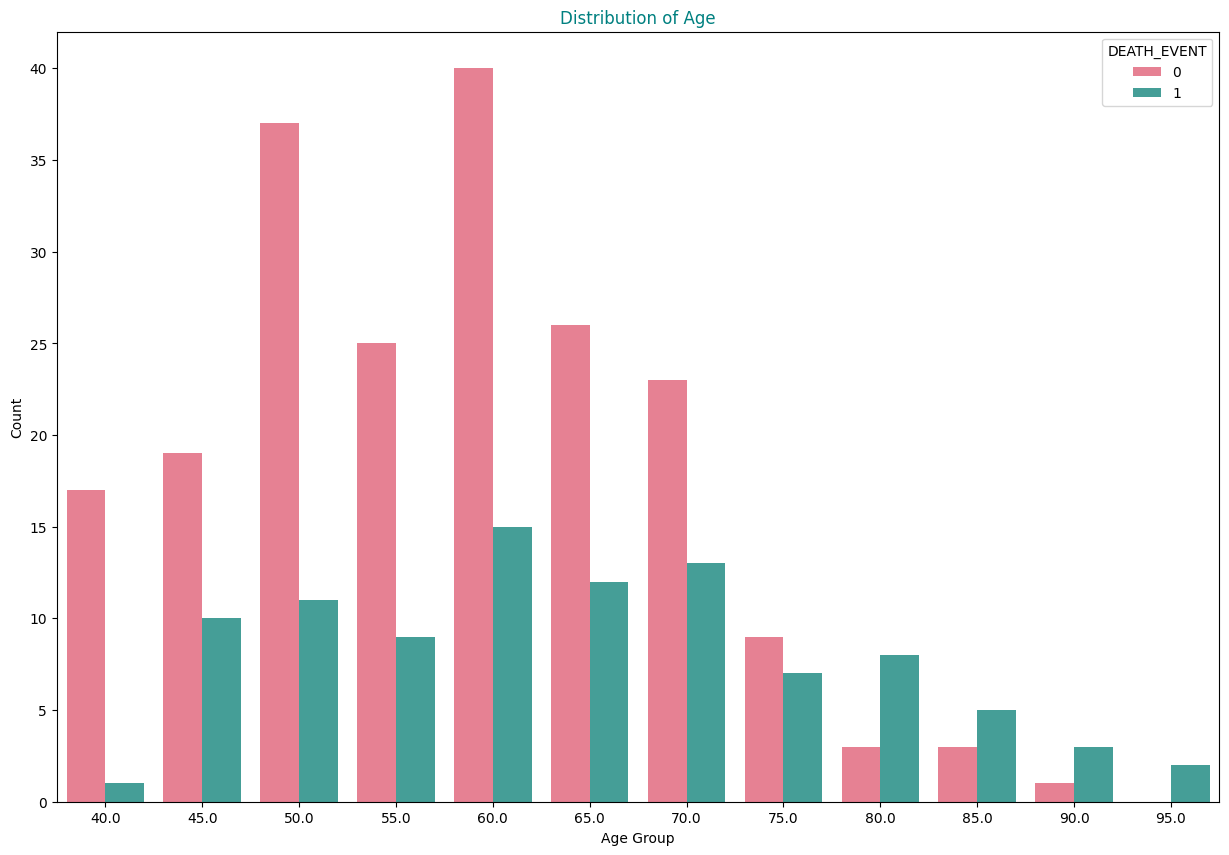

In [658]:
# countplot of age groups with hue as 'DEATH_EVENT'
# Group 'age' column by 5 years
data['age_group'] = (data['age'] // 5) * 5

plt.figure(figsize=(15, 10))

age_distribution = sns.countplot(x=data['age_group'], data=data, hue='DEATH_EVENT', palette='husl')

age_distribution.set_title('Distribution of Age', color='teal')
age_distribution.set_xlabel('Age Group')
age_distribution.set_ylabel('Count')

In [659]:
data = data.drop('age_group', axis=1)

#### 2.2. Check through visualisations for outliers

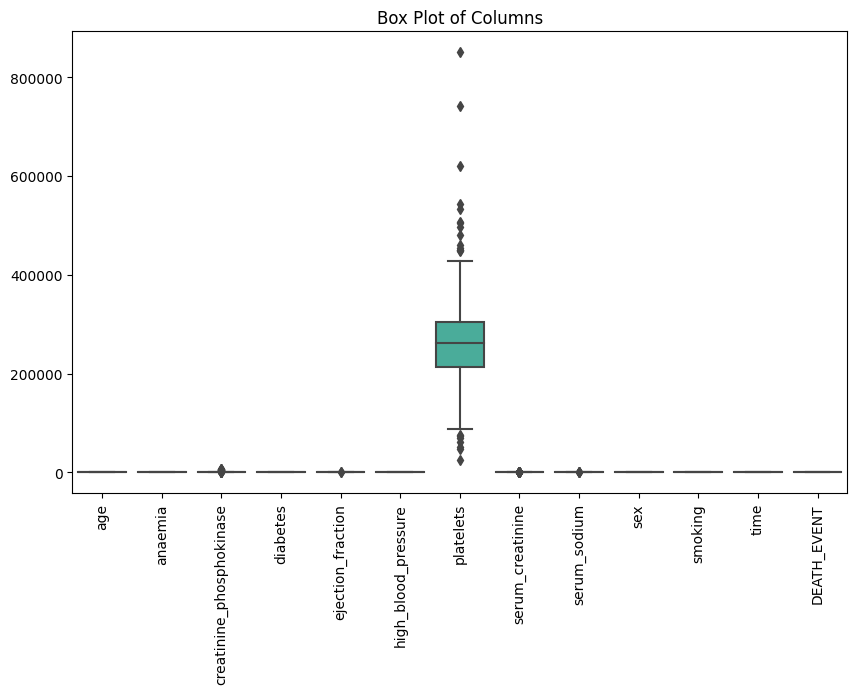

In [660]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Box Plot of Columns")
plt.xticks(rotation=90)  
plt.show()

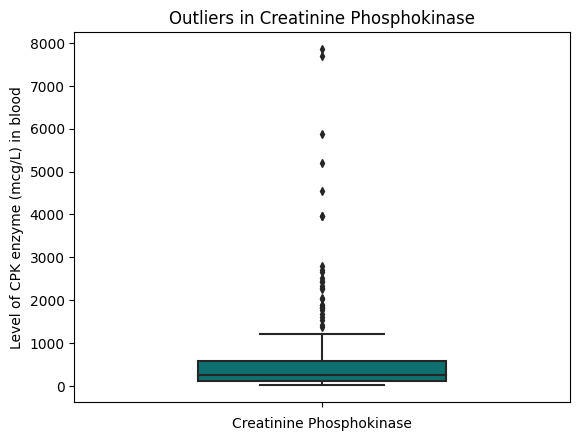

In [661]:
# Create a box plot to visualize outliers in creatinine_phosphokinase column
sns.boxplot(data=data, y='creatinine_phosphokinase', orient='v', width=0.5, color='teal', fliersize=4)

# Set plot title and labels
plt.title("Outliers in Creatinine Phosphokinase")
plt.xlabel("Creatinine Phosphokinase")
plt.ylabel("Level of CPK enzyme (mcg/L) in blood")

# Display the plot
plt.show()

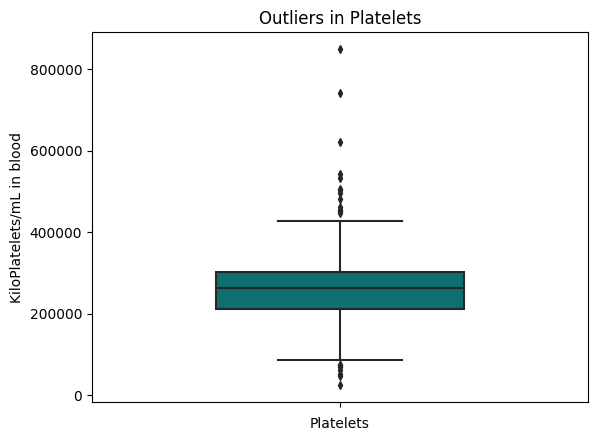

In [662]:
# Create a box plot to visualize outliers in 'platelets' column
sns.boxplot(data=data, y='platelets', orient='v', width=0.5, color='teal', fliersize=4)

# Set plot title and labels
plt.title("Outliers in Platelets")
plt.xlabel("Platelets")
plt.ylabel("KiloPlatelets/mL in blood")

# Display the plot
plt.show()

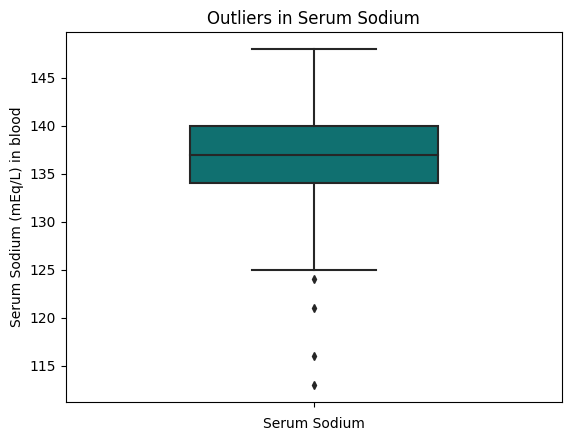

In [663]:
# Create a box plot to visualize outliers in serum_sodium column
sns.boxplot(data=data, y='serum_sodium', orient='v', width=0.5, color='teal', fliersize=4)

# Set plot title and labels
plt.title("Outliers in Serum Sodium")
plt.xlabel("Serum Sodium")
plt.ylabel("Serum Sodium (mEq/L) in blood")

# Display the plot
plt.show()

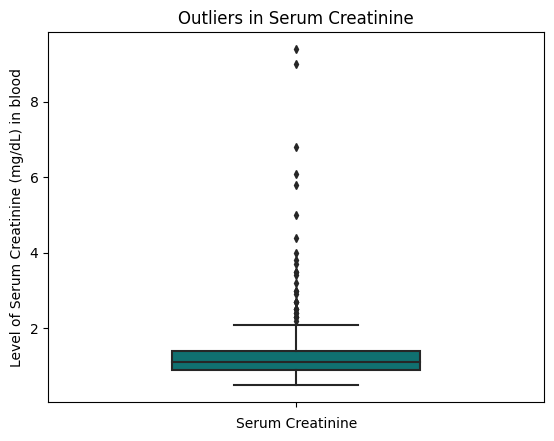

In [664]:
#Create a box plot to visualize outliers in serum_creatinine column
sns.boxplot(data=data, y='serum_creatinine', orient='v', width=0.5, color='teal', fliersize=4)

# Set plot title and labels
plt.title("Outliers in Serum Creatinine")
plt.xlabel("Serum Creatinine")
plt.ylabel("Level of Serum Creatinine (mg/dL) in blood")

# Display the plot
plt.show()

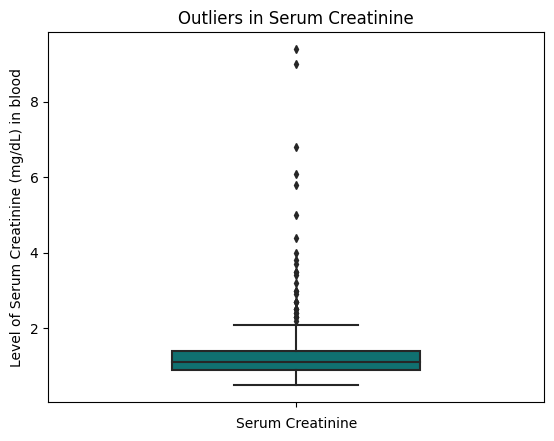

In [665]:
#Create a box plot to visualize outliers in serum_creatinine column
sns.boxplot(data=data, y='serum_creatinine', orient='v', width=0.5, color='teal', fliersize=4)

# Set plot title and labels
plt.title("Outliers in Serum Creatinine")
plt.xlabel("Serum Creatinine")
plt.ylabel("Level of Serum Creatinine (mg/dL) in blood")

# Display the plot
plt.show()

In [666]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 3. CLEANING & PREPARING DATA

#### 3.1. Replace outliers with median values in 'platelets' column

In [667]:
## Tried replacing outliers in other columns too, but it reduced the model's ability to predict accurately. So will only replace outliers in 'platelets' column as this seems to improve model's prediction power.

data['platelets'].fillna(data['platelets'].median(), inplace=True)

#### 3.2. Scale ysing MinMaxScaler

In [668]:
# Initialising a MinMaxScaler object
scaler = MinMaxScaler()

# Selecting the columns to normalize
cols_to_normalize = ['creatinine_phosphokinase', 'platelets']

# Applying the scaler to the selected columns below
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

## Tried to normalise all non-categorical columns, but it seemed to reduce the model's ability to predict accurately. So will stick with the above two features only.

#### 3.3. Split data into features (x) and target (y)

In [669]:
x = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

#### 3.4. Split data into training & test sets

In [670]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 4. BUILDING ANN (Artificial Neural Networks) MODEL 

#### 4.1. Apply Early Stopping

In [671]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01,
    patience=10,
    restore_best_weights=True)

#### 4.2. Build ANN Model

In [672]:
model =  Sequential()

# set up layers

## input layers
model.add(Dense(units = 225, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

## hidden layer
model.add(Dense(units = 70, kernel_initializer = 'uniform', activation = 'relu'))

## network carefully understands the patterns that exist in your data
## regularization --- help to stop overfitting
model.add(Dropout(0.2))

## output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [673]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 225)               2925      
                                                                 
 dense_58 (Dense)            (None, 70)                15820     
                                                                 
 dropout_19 (Dropout)        (None, 70)                0         
                                                                 
 dense_59 (Dense)            (None, 1)                 71        
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [674]:
history = model.fit(x_train, y_train, batch_size= 32, epochs= 10, callbacks= early_stopping, validation_split= 0.30)

Epoch 1/10
6/6 [==============================] - 1s 41ms/step - loss: 0.6293 - accuracy: 0.6108 - val_loss: 0.4991 - val_accuracy: 0.7222
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 0.4546 - accuracy: 0.7904 - val_loss: 0.4758 - val_accuracy: 0.8194
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 0.4440 - accuracy: 0.7964 - val_loss: 0.4727 - val_accuracy: 0.8333
Epoch 4/10
6/6 [==============================] - 0s 9ms/step - loss: 0.4159 - accuracy: 0.8623 - val_loss: 0.4472 - val_accuracy: 0.8750
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.4194 - accuracy: 0.8443 - val_loss: 0.4415 - val_accuracy: 0.8750
Epoch 6/10
6/6 [==============================] - 0s 9ms/step - loss: 0.3663 - accuracy: 0.8743 - val_loss: 0.4551 - val_accuracy: 0.8333
Epoch 7/10
6/6 [==============================] - 0s 9ms/step - loss: 0.3854 - accuracy: 0.8563 - val_loss: 0.4330 - val_accuracy: 0.8750
Epoch 8/10
6/6 [=================

### 5. EVALUATING THE ANN MODEL

In [675]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 84.17%


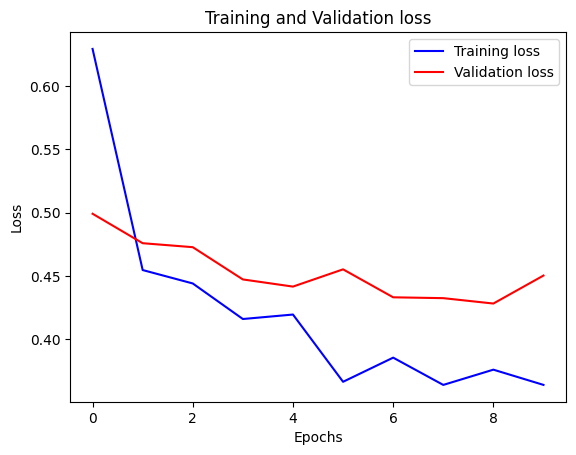

In [676]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "blue", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"red", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

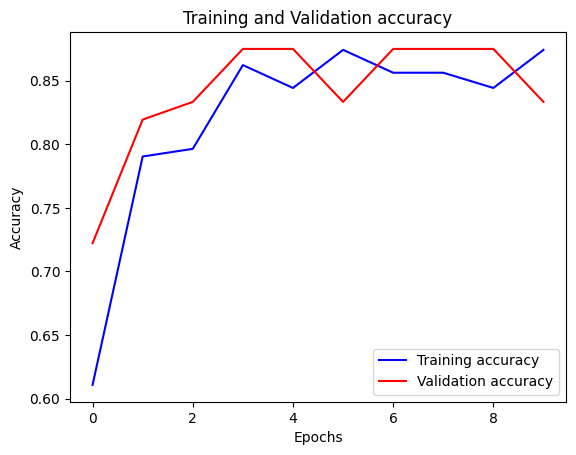

In [677]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "blue", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"red", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [678]:
y_pred_ann = model.predict(x_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0) 

2/2 [==============================] - 0s 3ms/step


In [679]:
print(y_test.shape)
print(y_pred_ann.shape)

(60,)
(60, 1)


In [680]:
y_pred_ann = y_pred_ann.flatten()

In [681]:
print(y_test.shape)
print(y_pred_ann.shape)

(60,)
(60,)


In [682]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
281,0,0
265,0,0
164,1,0
9,1,1
77,0,0
278,0,0
93,1,0
109,0,0
5,1,1
173,0,0


In [683]:
conf_m = confusion_matrix(y_test, y_pred_ann)
conf_m

array([[33,  2],
       [10, 15]])

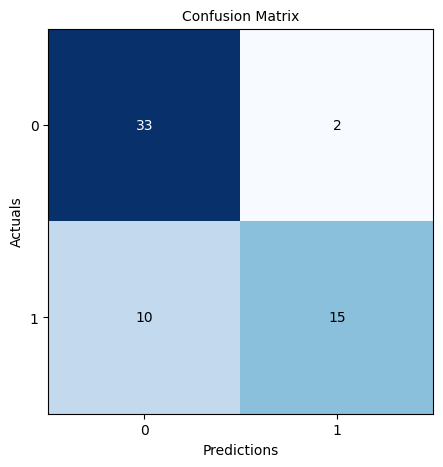

In [684]:
fig, ax = plot_confusion_matrix(conf_mat=conf_m, figsize=(5, 5), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [685]:
auc = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc)

AUC: 0.771429


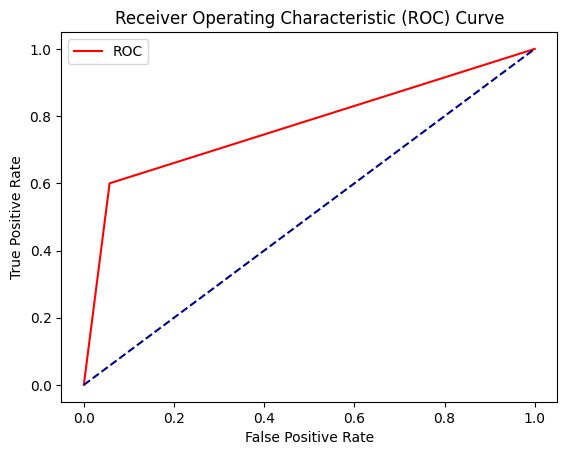

In [686]:
fpr, tpr = roc_curve(y_test, y_pred_ann)[0:2]

plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [687]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



### 6. SAVE & LOAD MODEL ANN_01'

In [688]:

# model.save('simple_ann_model_01')

# model = tf.keras.models.load_model('simple_ann_model_01')

### 7. Another Approach: Standardisation (instead of Normalisation)

#### 7.1. Re-split data using new variables and apply StandardScaler()

* Tinkering with the unit numbers in my previous model's layers has only reduced the model's ability to predict accurately. I have therefore left the model as it is since those are the unit numbers yielding the best results. However, this suggests that it is the data that I'm feeding into the model that may be the culprit. Hence, I will change approach & now modify the data I'm feeding into my model, and build a new ANN model on this basis. 
* I previously used the MinMaxScaler() function to normalalise all features, but this didn't yield the best results. So I then limited this to the 'platelets' and 'creatinine_phosphokinase', which yielded better results.
* I now want to try another attempt: to standardise the features using the StandardScaler() function instead, and see if my model can predict better.
* I will also convert floats to integers to see if that improves things.
* I will re-split data again using new variables. I will then perform the StandardScaler function & build a new model on that basis.

In [689]:
X = data.drop("DEATH_EVENT", axis=1)
Y = data["DEATH_EVENT"]

In [690]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [691]:
# Convert variables from float to integer
columns_to_convert = ['serum_creatinine', 'age', 'creatinine_phosphokinase', 'platelets']
data[columns_to_convert] = data[columns_to_convert].astype(int)


In [692]:
# Apply Standard Scaler
scaler_02 = StandardScaler()
X_train= scaler_02.fit_transform(X_train)
X_test = scaler_02.transform(X_test)

In [693]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01,
    patience=10,
    restore_best_weights=True)

#### 7.2. Build ANN_02 Model
* I will also change input & hidden layer unit to 16/8 (did yield great results in previous model, but will try with new model as I'm change the standardoisation approach, so it might work better)

In [694]:
model2 =  Sequential()

# set up layers

## input layers
model2.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

## hidden layer
model2.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

## network carefully understands the patterns that exist in your data
## regularization --- help to stop overfitting
model2.add(Dropout(0.25))

## output layer
model2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## compiling the ANN
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [695]:
model2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 16)                208       
                                                                 
 dense_61 (Dense)            (None, 8)                 136       
                                                                 
 dropout_20 (Dropout)        (None, 8)                 0         
                                                                 
 dense_62 (Dense)            (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [696]:
history2 = model2.fit(X_train, Y_train, batch_size= 32, epochs= 80, callbacks= early_stopping, validation_split= 0.25)

Epoch 1/80


6/6 [==============================] - 1s 37ms/step - loss: 0.6927 - accuracy: 0.6369 - val_loss: 0.6918 - val_accuracy: 0.7167
Epoch 2/80
6/6 [==============================] - 0s 9ms/step - loss: 0.6914 - accuracy: 0.6983 - val_loss: 0.6905 - val_accuracy: 0.7167
Epoch 3/80
6/6 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.6983 - val_loss: 0.6890 - val_accuracy: 0.7167
Epoch 4/80
6/6 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.6983 - val_loss: 0.6875 - val_accuracy: 0.7167
Epoch 5/80
6/6 [==============================] - 0s 8ms/step - loss: 0.6870 - accuracy: 0.6983 - val_loss: 0.6858 - val_accuracy: 0.7167
Epoch 6/80
6/6 [==============================] - 0s 8ms/step - loss: 0.6851 - accuracy: 0.6983 - val_loss: 0.6839 - val_accuracy: 0.7167
Epoch 7/80
6/6 [==============================] - 0s 8ms/step - loss: 0.6828 - accuracy: 0.6983 - val_loss: 0.6816 - val_accuracy: 0.7167
Epoch 8/80
6/6 [============================

#### 7.3. Evaluate ANN_02

In [697]:
val_accuracy2 = np.mean(history2.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy2 is', val_accuracy2*100))


val_accuracy2 is: 74.17%


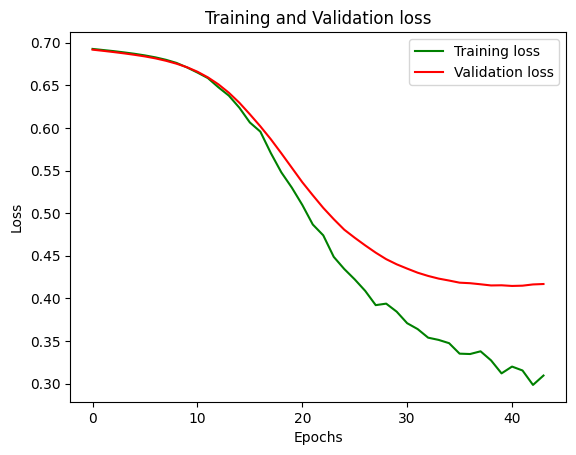

In [698]:
history_df2 = pd.DataFrame(history2.history)

plt.plot(history_df2.loc[:, ['loss']], "green", label='Training loss')
plt.plot(history_df2.loc[:, ['val_loss']],"red", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

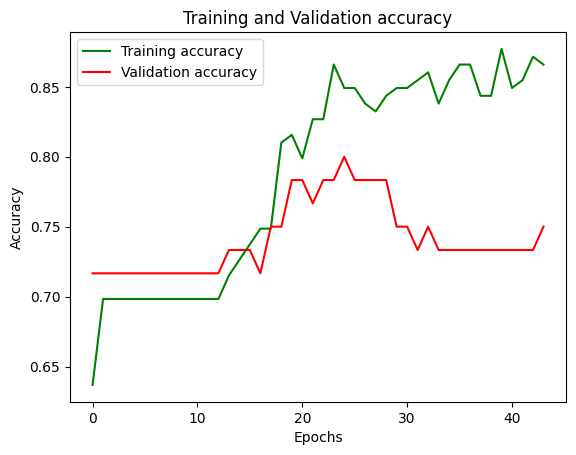

In [699]:
history_df2 = pd.DataFrame(history2.history)

plt.plot(history_df2.loc[:, ['accuracy']], "green", label='Training accuracy')
plt.plot(history_df2.loc[:, ['val_accuracy']],"red", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [700]:
Y_pred_ann = model2.predict(X_test)
Y_pred_ann = np.where(Y_pred_ann > 0.5, 1, 0) 

2/2 [==============================] - 0s 4ms/step


In [701]:
print(Y_test.shape)
print(Y_pred_ann.shape)

(60,)
(60, 1)


In [702]:
Y_pred_ann = Y_pred_ann.flatten()

In [703]:
print(Y_test.shape)
print(Y_pred_ann.shape)

(60,)
(60,)


In [704]:
acc_pred_model2 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_ann})
acc_pred_model2

,Actual,Predicted
281,0,0
265,0,0
164,1,0
9,1,1
77,0,0
278,0,0
93,1,1
109,0,0
5,1,1
173,0,0


In [705]:
conf_model2 = confusion_matrix(Y_test, Y_pred_ann)
conf_model2

array([[35,  0],
       [13, 12]])

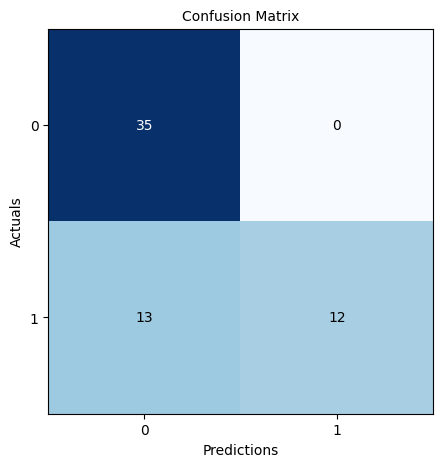

In [706]:
fig, ax = plot_confusion_matrix(conf_mat=conf_model2, figsize=(5, 5), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [707]:
auc2 = roc_auc_score(Y_test, Y_pred_ann)
print('AUC: %f' %auc2)

AUC: 0.740000


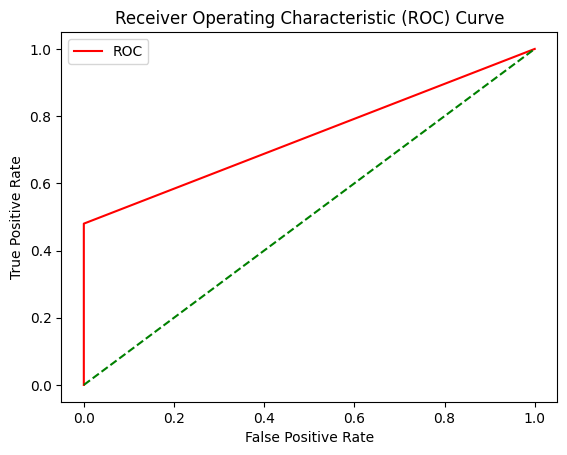

In [708]:
fpr, tpr = roc_curve(Y_test, Y_pred_ann)[0:2]

plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [709]:
print(classification_report(Y_test, Y_pred_ann))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        35
           1       1.00      0.48      0.65        25

    accuracy                           0.78        60
   macro avg       0.86      0.74      0.75        60
weighted avg       0.84      0.78      0.76        60



#### 7.4. Save & Load Model ANN_02

In [710]:
# model2.save('simple_ann_model_02')

# model2 = tf.keras.models.load_model('simple_ann_model_02')

2023-06-19 09:13:28.579358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,8]
	 [[{{node inputs}}]]
2023-06-19 09:13:28.770615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,8]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: simple_ann_model_02/assets


INFO:tensorflow:Assets written to: simple_ann_model_02/assets


### CONCLUSION

#### My first ANN model seems to have a better accuracy score (84.17%) and the confusion matrix show a total of 12 false negatives + positives. On the other hand, my second approach in ANN Model 2 has a lower accuracy score (73.17%) and the confusion matrix for that model shows a slight raise in the total of false predictions (13). So it seems that normalising the feature values works better than standardising them, which isn't surprising since normalisation tends to work better with this sort of problem & model. Finally, converting floats to integers did not seem to have a significant effect on the overal performance of model 2. 